# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#explore data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
np_temp = df['temperature'].values
temp_mean = np.mean(np_temp)
temp_std = np.std(np_temp)

## 1. Is the distribution of body temperatures normal?
An exploration of the dataset with normal distribution and CDF should provide an graphical solution 

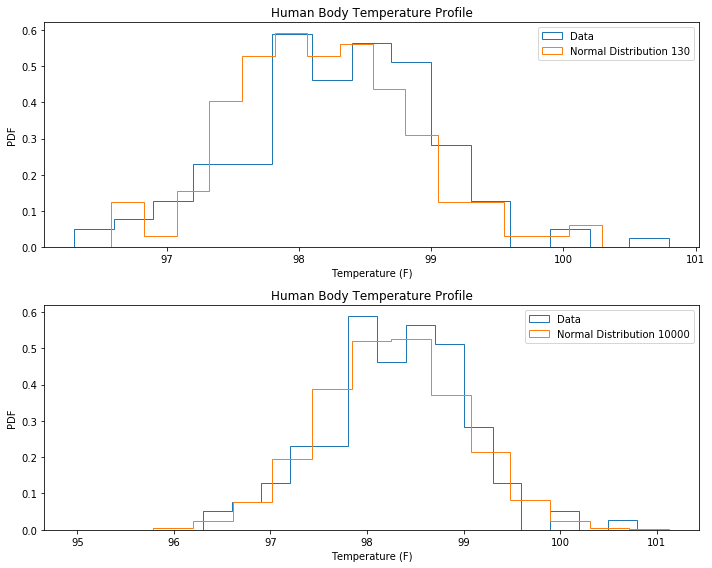

In [5]:
#looking at the histogram, the data appears to be slightly left skewed. But pretty normalized
norm_dis130 = np.random.normal(temp_mean, temp_std, size = 130)
norm_dis10000 = np.random.normal(temp_mean, temp_std, size = 10000)

plt.figure(figsize = [10, 8])
plt.subplot(2, 1, 1)
_ = plt.hist(df['temperature'], bins = 15, normed = True, histtype = 'step')
_ = plt.hist(norm_dis130, bins = 15, histtype = 'step', normed = True)
plt.xlabel('Temperature (F)')
plt.title('Human Body Temperature Profile')
plt.ylabel('PDF')
plt.legend(('Data', 'Normal Distribution 130'), loc = 'upper right')

plt.subplot(2, 1, 2)
_ = plt.hist(df['temperature'], bins = 15, normed = True, histtype = 'step')
_ = plt.hist(norm_dis10000, bins = 15, histtype = 'step', normed = True)
plt.xlabel('Temperature (F)')
plt.title('Human Body Temperature Profile')
plt.ylabel('PDF')
plt.legend(('Data', 'Normal Distribution 10000'), loc = 'upper right')
plt.tight_layout()

In [6]:
#define ecdf
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, 1 + len(data))/len(data)
    return x, y

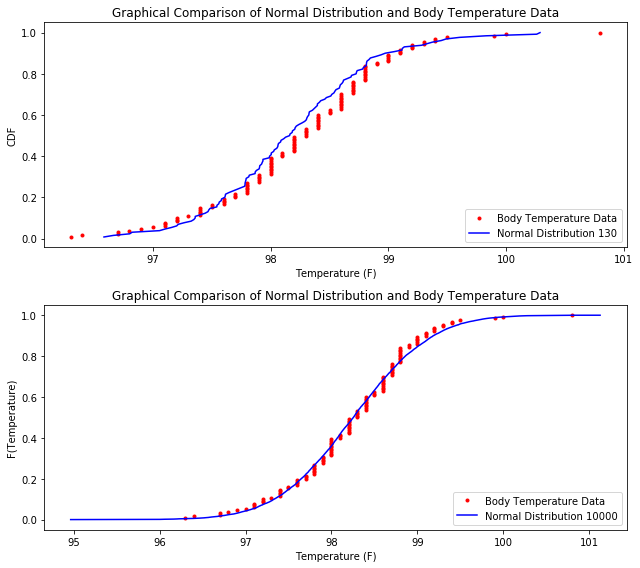

In [7]:
#Plot the cdf of normal distribution based on mean and std of dataset and graph it to the cdf of body temperature data
ecdf_x, ecdf_y = ecdf(np_temp)
ecdf_norm130x, ecdf_norm130y = ecdf(norm_dis130)
ecdf_norm10000x, ecdf_norm10000y = ecdf(norm_dis10000)

plt.figure(figsize = [9, 8])
plt.subplot(2, 1, 1)
_ = plt.plot(ecdf_x, ecdf_y, marker = '.', linestyle = 'none', color = 'red')
_ = plt.plot(ecdf_norm130x, ecdf_norm130y, color = 'blue')
plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.title('Graphical Comparison of Normal Distribution and Body Temperature Data')
plt.legend(('Body Temperature Data', 'Normal Distribution 130'), loc = 'lower right')

plt.subplot(2, 1, 2)
_ = plt.plot(ecdf_x, ecdf_y, marker = '.', linestyle = 'none', color = 'red')
_ = plt.plot(ecdf_norm10000x, ecdf_norm10000y, color = 'blue')
plt.xlabel('Temperature (F)')
plt.ylabel('F(Temperature)')
plt.title('Graphical Comparison of Normal Distribution and Body Temperature Data')
plt.legend(('Body Temperature Data', 'Normal Distribution 10000'), loc = 'lower right')
plt.tight_layout()

From the observed random normal distribution for 130 and 10000 samples clearly shows 10000 is more normally distributed. Since the dataset only have 130 sample size, it more realistic to compare the similar sample size to determine whether the sample is normalize. Both PDF and CDF comparison for 130 sample size shows clear choppiness but maintain structural integrity for normal distribution

## 2. Is the sample size large? Are the observations independent?

Exploration of the sample size and idea of population size would resolve the question

In [8]:
print('Dataset size: n = ' + str(len(np_temp)))

Dataset size: n = 130


We have 130 samples of data from a pool of world population, which fullfills the criteria of n > 30 for normal distributed sample population. The sample is large enough and can be considered independent by the < 10% rule

## 3. Is the true population mean really 98.6 degrees F
First, try a bootstrap hypothesis test
<br>Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
<br>In this situation, is it appropriate to use the  t  or  z  statistic?
<br>Now try using the other test. How is the result be different? Why?


<br> I would use one-sample test because the problem is comparing 98.6F to 98.2F found in the dataset.
<br>H0: mean = 98.6F 
<br>Ha: mean < 98.6F

<br> Both t or z statistic would work fine in this sample. Personally z-statistic would be more intuitive and easier since the degrees of freedom is large. 

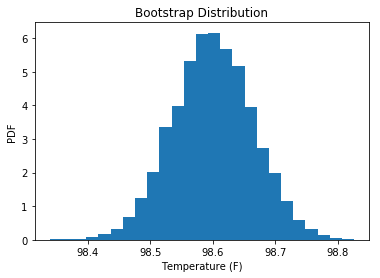

In [9]:
###bootstrap the sample after adjusting the mean to 98.6
new_np_temp = np_temp - np.mean(np_temp) + 98.6
boot_10000 = []
for x in range(10000):
    sample = np.random.choice(new_np_temp, size = len(np_temp))
    mean = np.mean(sample)
    boot_10000.append(mean)
boot_10000 = np.array(boot_10000)
_ = plt.hist(boot_10000, bins = 25, normed = True)
plt.xlabel('Temperature (F)')
plt.ylabel('PDF')
plt.title('Bootstrap Distribution')

In [10]:
###evaluate p-value
under_mean = boot_10000[boot_10000 < np.mean(np_temp)]
p_value = sum(under_mean)/len(boot_10000)
print('p-value is ' + str(p_value))

p-value is 0.0


Bootstrap testing shows no occurence of 98.2F in the bootstrap model; as a result, we reject the null hypothesis and accepts the alternative hypothesis that the true mean is less than 98.2F.

In [11]:
z_score = (98.6-temp_mean)/(temp_std/np.sqrt(130))
p_value = 1 - stats.norm.cdf(z_score)
print('The p-value is ' + str(round(p_value, 2)))

The p-value is 0.0


The z-score yield practically 0 for p-value for both t-statistics and z-statistics and thus rejecting the null hypothesis that p = 98.6F.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
We should use t-statistics for this because a draw of 10 points from the data is less than 30 and cannot be approximated as a normal distribution

In [12]:
sample10 = np.random.choice(new_np_temp, size = 10)

In [13]:
sample10_mean = np.mean(sample10)
sample10_std = np.std(sample10)

In [14]:
z_score = (98.6 - sample10_mean)/(sample10_std/np.sqrt(10))
p_value = 1- stats.t.cdf(z_score, 9)
print('The p-value is ' + str(round(p_value, 3)) + ' using t-test')

The p-value is 0.878 using t-test


In [15]:
p_value = 1 - stats.norm.cdf(z_score)
print('The p-value is ' + str(round(p_value, 3)) + ' using z-test')

The p-value is 0.893 using z-test


The p-value for t-statistic is determined to be 0.878 and we failed to reject the null hypothesis. The p-value for z-statistic is 0.878 and again failed to reject the null hypothesis. Although the final results ended up failing to reject the null hypothesis, the p-values evaluated for z-statistics is clearly more generous. t-statistics should be used for n < 30

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
A evaluation of the margin of error and the confidence interval should determine abnormality. A p-value of 5% would be consider abnormal and should be treated as such.

The mean of the margin error is 1.42


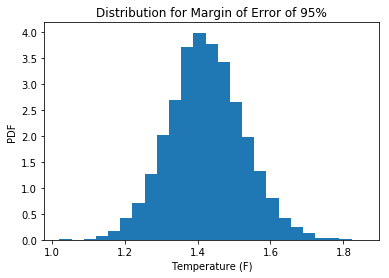

In [16]:
#bootstrap taking the margin of error as samples
boot_10000 = []

for i in range(10000):
    rand_boot = np.random.choice(np_temp, size = 130)
    mar_err = 1.96*np.std(rand_boot)
    boot_10000.append(mar_err)

boot_10000 = np.array(boot_10000)
_ = plt.hist(boot_10000, bins = 25, normed = True)
plt.xlabel('Temperature (F)')
plt.ylabel('PDF')
plt.title('Distribution for Margin of Error of 95%')

print('The mean of the margin error is ' + str(round(np.mean(boot_10000), 2)))

In [17]:
print('The data shows a 95% confidence interval of temperature between ' + 
      str(round(temp_mean - np.mean(boot_10000), 1)) + 'F' +
      ' and ' + str(round(temp_mean + np.mean(boot_10000),1)) + 
      'F' + ' with an average margin of error of 1.4F')

The data shows a 95% confidence interval of temperature between 96.8F and 99.7F with an average margin of error of 1.4F


In [18]:
LowerCI, UpperCI = np.percentile(np_temp, [2.5, 97.5])
MOE = (UpperCI - LowerCI)/2
print('The data shows a 95% confidence interval of temperature between ' 
      + str(round(LowerCI, 1)) + 'F and ' + str(round(UpperCI, 1)) + 
      'F with an average margin of error of ' + str(round(MOE, 1)) + 'F.' )

The data shows a 95% confidence interval of temperature between 96.7F and 99.5F with an average margin of error of 1.4F.


## 6. Is there a significant difference between males and females in normal temperature?
known popularly now a days, females tend to have slightly higher body temperature than males. An exploration of the second feature on the body temperature would reveal if the margin is statistically significant
<br> First the data can be represented by CDF of the given data to visually sight differences
<br> Then a bootstrap approach using permutation on the mean and take the difference of mean. Then conduct an hypothesis test with a significant level of 0.05
<br> Ho: temp(F) = temp(M)
<br> Ha: temp(F) > temp(M)

In [19]:
# data wrangle the male and female temp
male_temp = df[df['gender'] == 'M']['temperature']
female_temp = df[df['gender'] == 'F']['temperature']

In [20]:
male_temp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [21]:
female_temp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

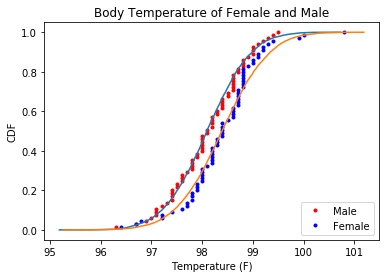

In [22]:
#graph ecdf
male_norm = np.random.normal(np.mean(male_temp), np.std(male_temp), size = 10000)
female_norm = np.random.normal(np.mean(female_temp), np.std(female_temp), size = 10000)
male_normx, male_normy = ecdf(male_norm)
female_normx, female_normy = ecdf(female_norm)
temp_malex, temp_maley = ecdf(male_temp)
temp_femalex, temp_femaley = ecdf(female_temp)

_ = plt.plot(temp_malex, temp_maley, marker = '.', linestyle = 'none', color = 'red')
_ = plt.plot(temp_femalex, temp_femaley, marker = '.', linestyle = 'none', color = 'blue')
_ = plt.plot(male_normx, male_normy)
_ = plt.plot(female_normx, female_normy)
plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.title('Body Temperature of Female and Male')
plt.legend(('Male', 'Female'), loc = 'lower right')

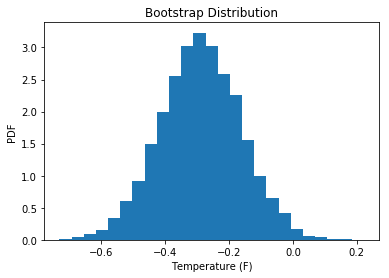

In [23]:
##bootstrap approach
diff = np.mean(male_norm) - np.mean(female_norm)
indx = np.arange(130)
bootm_10000 = []
for i in range(10000):
    boot_indx = np.random.choice(indx, size = 130)
    boot = df.iloc[boot_indx]
    boot_female_mean = np.mean(boot[boot['gender'] == 'F'].temperature)
    boot_male_mean = np.mean(boot[boot['gender'] == 'M'].temperature)
    difference = boot_male_mean - boot_female_mean
    bootm_10000.append(difference)
bootm_10000 = np.array(bootm_10000)
_ = plt.hist(bootm_10000, bins = 25, normed = True)
plt.xlabel('Temperature (F)')
plt.ylabel('PDF')
plt.title('Bootstrap Distribution')

In [24]:
crit_bootm = bootm_10000 <= diff
p_value = np.sum(crit_bootm)/len(bootm_10000)
print('The p-value is ' + str(round(p_value, 2)))

The p-value is 0.47


The bootstrap hypothesis test fail to reject the null hypthothesis with p-value of 0.51. 

Since from the graphical observation of the female temperature depicts an approximate normal distribution and n > 30, the the p-value yield 0.51 and again failed to reject the null hypothesis. 

In terms of the context of the assignment, the data does not show enough evidence that the gender is correlated to body temperature.